<a href="https://colab.research.google.com/github/Luandersonsouza/DU-starter/blob/main/DU_learning_datas_chapter_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dicionário dos Dados

Esta pesquisa empregou uma variável binária, pagamento padrão (Sim = 1, Não = 0), como a variável de resposta. Este estudo revisou a literatura e utilizou as seguintes 23 variáveis como variáveis explicativas:

- X1: Valor do crédito concedido (dólar NT): inclui tanto o crédito individual do consumidor quanto o crédito familiar (suplementar).
- X2: Gênero (1 = masculino; 2 = feminino).
- X3: Educação (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros).
- X4: Estado civil (1 = casado; 2 = solteiro; 3 = outros).
- X5: Idade (ano).
- X6 - X11: Histórico de pagamentos anteriores. Acompanhamos os registros mensais de pagamento passado (de abril a setembro de 2005) da seguinte forma: X6 = status de pagamento em setembro de 2005; X7 = status de pagamento em agosto de 2005; . . .; X11 = status de pagamento em abril de 2005. A escala de medição para o status de pagamento é: -1 = pagar pontualmente; 1 = atraso no pagamento por um mês; 2 = atraso no pagamento por dois meses; . . .; 8 = atraso no pagamento por oito meses; 9 = atraso no pagamento por nove meses ou mais.
- X12-X17: Valor do extrato de conta (dólar NT). X12 = valor do extrato de conta em setembro de 2005; X13 = valor do extrato de conta em agosto de 2005; . . .; X17 = valor do extrato de conta em abril de 2005.
- X18-X23: Valor do pagamento anterior (dólar NT). X18 = valor pago em setembro de 2005; X19 = valor pago em agosto de 2005; . . .; X23 = valor pago em abril de 2005.


#Importando Bibliotecas

In [83]:
import pandas as pd

## Carregando Dados

In [84]:
url = 'https://github.com/TrainingByPackt/Data-Science-Projects-with-Python/raw/master/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls'
df = pd.read_excel(url)

In [85]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Verificação da integridade dos dados


##Verificando a não repetição dos identificadores

In [86]:
df['ID'].nunique()

29687

## Verificando o total de Linhas

In [87]:
df.shape[0]

30000

# Contagem de IDs

In [88]:
id_counts = df['ID'].value_counts()
id_counts.head()

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: count, dtype: int64

## Contagem de repetições

In [89]:
id_counts.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

## Analisando dados duplicados


In [90]:
id_counts == 2
dupe_mask = id_counts

## IDs que se repetem


In [91]:
dupe_mask  = id_counts == 2
id_counts.index

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9', '2a793ecf-05c6', '75938fec-e5ec', '7be61027-a493',
       'a3a5c0fc-fdd6', 'b44b81b2-7789',
       ...
       'ed32d9fa-fc4d', '0d3c491a-f31a', '43b86f14-5293', '9aea1c3d-6a89',
       'eecd60d0-e496', '2edeb3a6-d38d', '27e11893-92e9', '2b1c282b-441e',
       'bd737997-0eb0', '15d69f9f-5ad3'],
      dtype='object', name='ID', length=29687)

## Selecionando IDs duplicados

In [92]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

## Verificando os primeiros 5 itens de `dupe_ids`

In [93]:
dupe_ids[:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

## Verificando linhas com IDs duplicados

In [94]:
df.loc[df['ID'].isin(dupe_ids[0:3]), :].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Preparando a matriz booleana para a filtragem do DataFrame

In [95]:
df_zero_mask = df == 0

##Criando uma série booleana

In [96]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis = 1)

##Soma de linhas com todas as colunas zeradas (menos o ID)

In [97]:
sum(feature_zero_mask)

315

## Eliminando todas as linhas com as colunas zeradas

In [98]:
df.loc[~feature_zero_mask, :]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Criando uma cópia da tabela já limpa


In [99]:
df_clean_1 = df.loc[~feature_zero_mask, :].copy()

###Verificando o shape do dataframe

In [100]:
df_clean_1.shape

(29685, 25)

### Verificando se o problema foi resolvido

In [101]:
df_clean_1['ID'].nunique()

29685

#Explorando e limpando dados

## Informações sobre o dataset

In [102]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


## Visualizando as 5 primeiras linhas

In [103]:
df_clean_1['PAY_1'].head()

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

## Contagem de valores únicos

In [104]:
df_clean_1['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

## Criação da máscara booleana para remover valores ausentes

In [105]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask.head()

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

## Verificando se a Máscara booleana funcionou


In [106]:
sum(valid_pay_1_mask)

26664

## Criando um dataframe novo após a aplicação da máscara booleana

In [107]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask, :].copy()

## Verificando o shape do dataframe

In [108]:
df_clean_2.shape

(26664, 25)

In [109]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype(int)

In [110]:
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


**Explicações adicionais sobre as colunas feitas pelo sócio da empresa**

* -2: significa que começou o mês sem valor a ser pago e o crédito não foi usado.
* -1: significa que um valor foi inteiramente pago.
*  0: significa que o pagamento mínimo foi feito, mas o saldo total devedor não foi pago.

# Importando bibliotecas e configurando Matplotlib


In [111]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Gerando histogramas para `AGE` e `LIMIT_BAL`

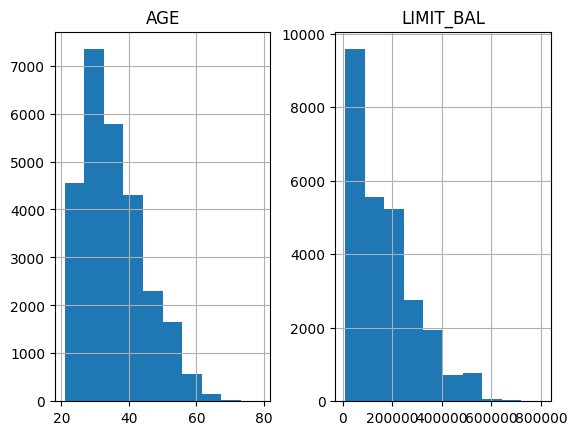

In [112]:
df_clean_2[['AGE', 'LIMIT_BAL']].hist();

## Estatísca descritiva para `AGE` e `LIMIT_BAL`


In [113]:
df_clean_2[['AGE', 'LIMIT_BAL']].describe()

,AGE,LIMIT_BAL
count,26664.000000,26664.000000
mean,35.505213,167919.054905
std,9.227442,129839.453081
min,21.000000,10000.000000
25%,28.000000,50000.000000
50%,34.000000,140000.000000
75%,41.000000,240000.000000
max,79.000000,800000.000000


## Contagem de ocorrências por categoria em `EDUCATION`

In [114]:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

## Transformando 0, 5 e 6 em outros (4)

In [115]:
df_clean_2['EDUCATION'].replace(to_replace = (0,5,6), value = 4, inplace = True)
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

## Contagem de ocorrências por categoria em `MARRIAGE`

In [116]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

## Transformando 0 em outros (3)

In [117]:
df_clean_2['MARRIAGE'].replace(to_replace =(0), value = 3, inplace = True)

#Características Categoricas

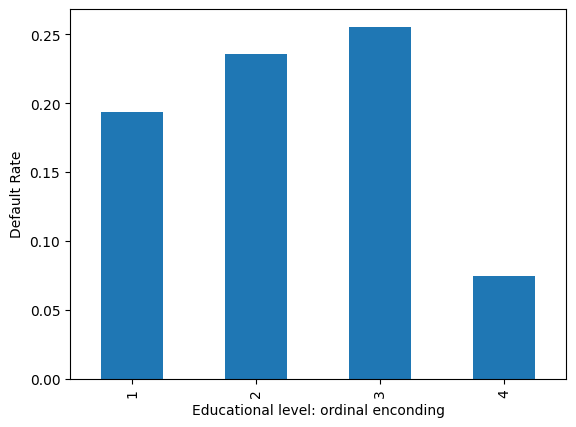

In [118]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend = False);
plt.ylabel('Default Rate');
plt.xlabel('Educational level: ordinal enconding');

# Implementando a OHE para uma característica categórica

*OHE significa ONE HOT ENCODING é uma técnica que usamos para representar variáveis categóricas como valores numéricos em um modelo de aprendizado de máquina.

## Criando uma coluna vazia para teste

In [119]:
df_clean_2['EDUCATION_CAT'] = 'none'

## Examinando as 10 primeiras linhas

In [120]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


## Criando um dicionário de mapeamento de categorias

In [121]:
cat_mapping = {
1 : 'graduate school',
2 : 'university',
3 : 'high school',
4 : 'others'
}

## Aplicando o mapeamento de categorias

In [122]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


## Codificação de características com OHE

In [123]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,True,False,False,False
6,True,False,False,False
7,False,False,False,True
8,False,True,False,False
9,False,True,False,False


## Concatenando o Dataframe Original com OHE

In [124]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis = 1)
df_with_ohe[['EDUCATION_CAT', 'graduate school','university','high school','others']]
df_with_ohe.shape

(26664, 30)

In [125]:
df_with_ohe.to_csv('chapter_1_cleaned_data.csv', index= False)

## Importando Bibliotecas

In [126]:
import numpy as np
import matplotlib.pyplot as plt

### Criando dados sintéticos

In [127]:
np.random.seed(1)
X = np.random.uniform(low = 0.0, high = 10.0, size = (1000,))
#print(len(X), X.max(), X.min())

slope = 0.25
intercept = -1.25
noise = np.random.normal(loc = 0.0, scale = 1.0, size = (1000,))

y = slope * X + intercept + noise

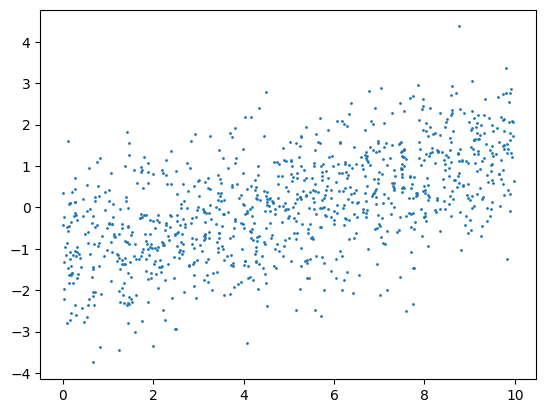

In [128]:
plt.scatter(X,y, s=1);

## Regressão linear com scikit - learn

### Instanciando o Modelo

In [129]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### Treinamento do Modelo

In [130]:
lr.fit(X.reshape(-1,1), y)

lr.coef_ , lr.intercept_

(array([0.25106337]), -1.2080021895763124)

### Fazendo previsões

In [131]:
#lr.predict(np.array([0.01]).reshape(-1,1))

In [132]:
y_pred = lr.predict(X.reshape(-1,1))
y_pred[:10]

array([-0.16101268,  0.60046878, -1.20771504, -0.44895584, -0.8395519 ,
       -0.9761738 , -0.74037102, -0.34042577, -0.21186439,  0.14476928])

### Plotando os dados e a linha de regressão

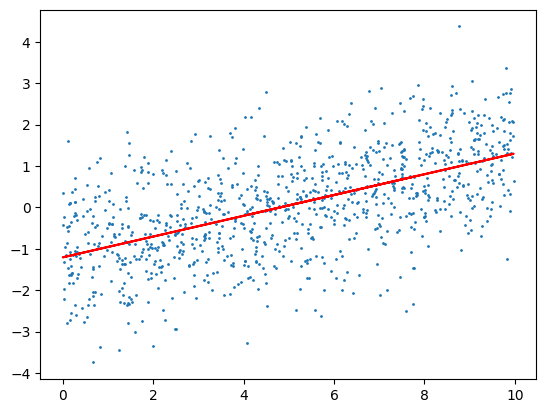

In [133]:
plt.scatter(X,y, s=1)
plt.plot(X,y_pred, 'r');

## Avaliação do Modelo

### Dividindo entre treino e teste

In [134]:
import pandas as pd

In [135]:
url = 'https://raw.githubusercontent.com/TrainingByPackt/Data-Science-Projects-with-Python/master/Data/Chapter_1_cleaned_data.csv'
df = pd.read_csv(url)

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (
    df['EDUCATION'].values.reshape(-1,1),
    df['default payment next month'].values,
    test_size=0.2,
    random_state = 24)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

np.mean(y_train), np.mean(y_test)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


(0.223102526838873, 0.21657603600225014)

## Criando o modelo

Executando o modelo nós podemos obter 0 ou 1 como resposta, 0 ele não é inadimplente e 1 é inadimplente no próximo mês.

In [137]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [138]:
acc = np.mean(y_pred == y_test)
#acc = sum(y_pred == y_test) / len(y_pred)
acc

0.7834239639977498

In [139]:
np.unique(y_pred), np.unique(y_test, return_counts = True)

(array([0]), (array([0, 1]), array([4178, 1155])))

## Matriz de Confusão

Uma matriz de confusão é uma tabela 2x2 que permite a visualização do desempenho de um algoritmo de classificação, contendo TP (Verdadeiros Positivos), TN (Falsos Negativos), FP(Falsos Positivos) e FN (Falsos Negativos).

In [140]:
#modelo = 1 -> real = 1 -> TP
#modelo = 0 -> real = 0 -> TN
#modelo = 1 -> real = 0 -> FP
#modelo = 0 -> real = 1 -> FN

TP = sum(y_pred==1) and sum(y_test ==1)
TN = sum(y_pred==0) and sum(y_test ==0)
FP = sum(y_pred==1) and sum(y_test ==0)
FN = sum(y_pred==0) and sum(y_test ==1)

TP, TN, FP, FN

(0, 4178, 0, 1155)

In [81]:
confusion_matrix = np.array([[TN, FP], [FN, TP]])
confusion_matrix

array([[4178,    0],
       [1155,    0]])

In [ ]:
sum(confusion_matrix.diagonal()) / confusion_matrix.sum()

## Calculando Acurácia

#Predict Proba (confiança do modelo)

In [142]:
lr.predict_proba(X_test)

array([[0.77460214, 0.22539786],
       [0.77460214, 0.22539786],
       [0.79040961, 0.20959039],
       ...,
       [0.79040961, 0.20959039],
       [0.79040961, 0.20959039],
       [0.79040961, 0.20959039]])

##Cálculo de soma de "probabilidades"

In [143]:
lr.predict_proba(X_test).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [63]:
np.sum(lr.predict_proba(X_test),1)

array([1., 1., 1., ..., 1., 1., 1.])

##Verificando o formtato do array

In [144]:
np.sum(lr.predict_proba(X_test), 1).shape

(5333,)

##Verificando elementos exclusivos com o unique

In [145]:
np.unique(np.sum(lr.predict_proba(X_test), 1))

array([1.])

##Verificar "probabilidades" positivas

In [146]:
pos_proba = lr.predict_proba(X_test)[:, 1]
pos_proba

array([0.22539786, 0.22539786, 0.20959039, ..., 0.20959039, 0.20959039,
       0.20959039])

## Calcular Histograma

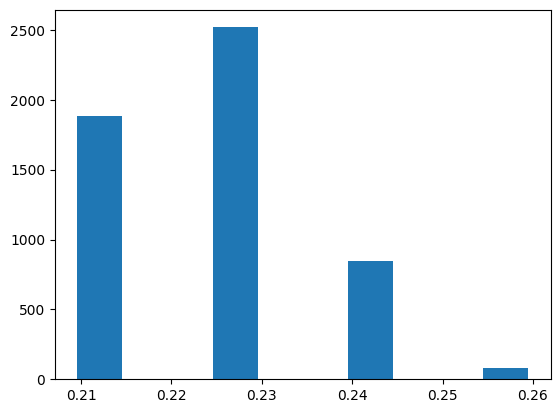

In [147]:
plt.hist(pos_proba);

## Plotando probabilidades

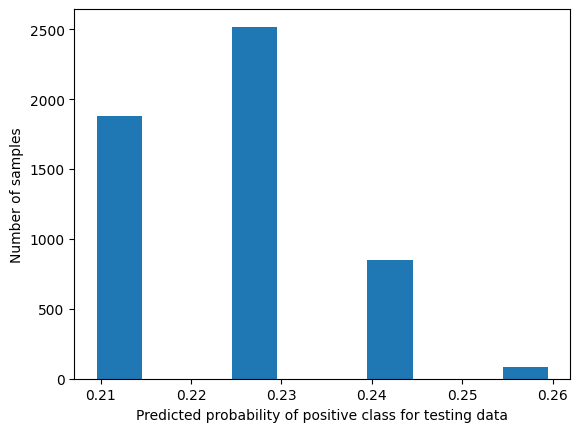

In [148]:
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data');
plt.ylabel('Number of samples');